# Define the problem

You have five years of google stock price, your job is to predict the next stock price

# Obtain Data

In [0]:
!wget https://www.dropbox.com/s/m6xpec59d3o757t/GoogleStockPrice.zip -q

In [2]:
!unzip GoogleStockPrice.zip

Archive:  GoogleStockPrice.zip
  inflating: Google_Stock_Price_Train.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._Google_Stock_Price_Train.csv  
  inflating: Google_Stock_Price_Test.csv  
  inflating: __MACOSX/._Google_Stock_Price_Test.csv  


In [3]:
ls -l

total 104
-rw-r--r-- 1 root root  1029 Apr  3  2017 Google_Stock_Price_Test.csv
-rw-r--r-- 1 root root 63488 Mar 30  2017 Google_Stock_Price_Train.csv
-rw-r--r-- 1 root root 24564 Dec 13 05:37 GoogleStockPrice.zip
drwxrwxr-x 2 root root  4096 Sep 16 15:45 __MACOSX/
drwxr-xr-x 1 root root  4096 Dec 10 17:34 sample_data/


# Analyze the data

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the training set
train_pd = pd.read_csv('Google_Stock_Price_Train.csv')


In [6]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


In [7]:
train_pd.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
train_pd.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [0]:
# Importing the test set
test_pd = pd.read_csv('Google_Stock_Price_Test.csv')


In [10]:
test_pd.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [11]:
test_pd.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


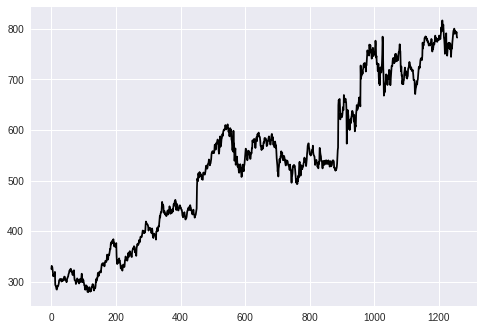

In [12]:
train_pd['Open'].plot(color='k')

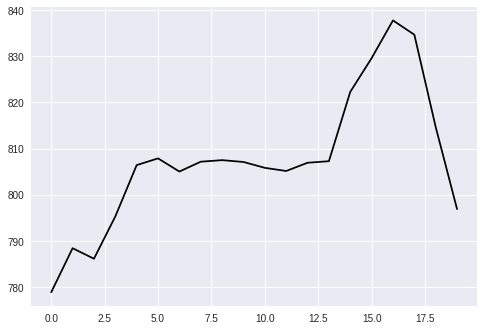

In [13]:
test_pd['Open'].plot(color='k')

# Feature Engineering

In [16]:
training_set = train_pd.iloc[:, 1:2].values
print(training_set)


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


In [18]:
print(sc.data_max_,sc.data_min_,sc.data_range_)

AttributeError: ignored

In [0]:
training_set_scaled = sc.fit_transform(training_set)


In [20]:
print(sc.data_max_,sc.data_min_,sc.data_range_)

[816.68] [279.12] [537.56]


In [21]:
training_set_scaled.shape

(1258, 1)

In [0]:
m = training_set_scaled.shape[0]

In [23]:
m

1258

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, m):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [26]:
x_train[0]

NameError: ignored

In [27]:
X_train.shape

(1198, 60)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [29]:
X_train.shape

(1198, 60, 1)

In [30]:
X_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

# Build the Model

In [31]:
# Part 2 - Building the RNN / LSTM

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
# Initialising the RNN
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]))
regressor.add(Dropout(0.2))


SyntaxError: ignored

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN
# learning rate is defined in the default paramater for "Adam"
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # RMSprop could also be used for RNN
# https://keras.io/optimizers/



In [39]:
regressor.summary()

ValueError: ignored

In [40]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)


Epoch 1/40
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0487
Epoch 2/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0052
Epoch 3/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 4/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0035
Epoch 5/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0037
Epoch 6/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0031
Epoch 7/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0038
Epoch 8/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0035
Epoch 9/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0032
Epoch 10/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0034
Epoch 11/40
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0036
Epoch 12/40
1198/1198 [==============================] - 17s 14

# Making the predictions and visualising the results


In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train_pd['Open'], test_pd['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_pd) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []


In [43]:
m = inputs.shape[0]
m

80

In [0]:
for i in range(60, m):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [0]:
predicted_scaled_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_scaled_price)

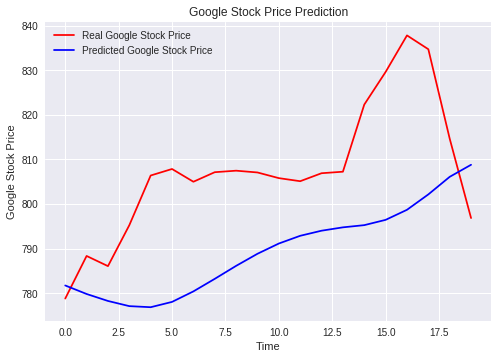

In [46]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

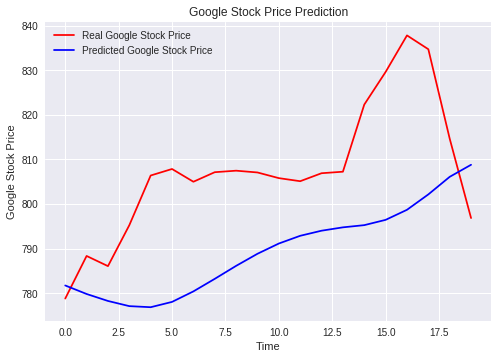

In [47]:

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()